## Loading the data + EDA

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns

In [4]:
housing_df = pd.read_csv('housing.csv')

In [5]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

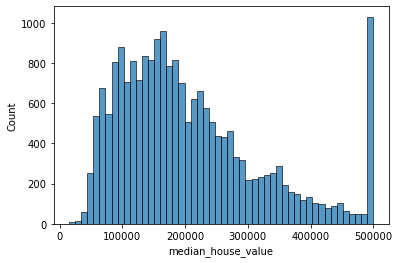

In [13]:
# target: median_house_value
# Does it have a long tail?
median_house_value_series = housing_df['median_house_value']
sns.histplot(median_house_value_series, bins=50)

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

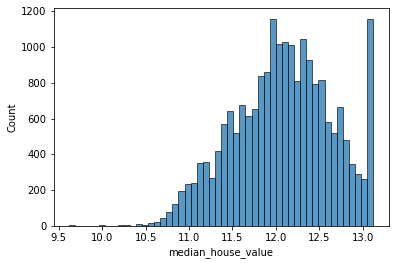

In [14]:
log_median_house_value_series = np.log1p(median_house_value_series)
sns.histplot(log_median_house_value_series, bins=50)

In [15]:
# features that we will use
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [16]:
columns_lst = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income',
           'median_house_value']

housing_df2 = housing_df.copy()
housing_df2 = housing_df2[columns_lst]

In [17]:
housing_df2.shape

(20640, 9)

### Question 1
Find a feature with missing values. How many missing values does it have?

In [18]:
housing_df2.isnull().sum()
# total_bedrooms have 207 missing values

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [23]:
print('total_bedrooms have 207 missing values')

total_bedrooms have 207 missing values


### Question 2
What's the median (50% percentile) for variable 'population'?

In [19]:
housing_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [20]:
housing_df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [21]:
housing_df2.describe()['population']

count    20640.000000
mean      1425.476744
std       1132.462122
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [22]:
print('The median for population variable is 1166')

The median for population variable is 1166


## Spliting the data

In [24]:
n = len(housing_df2)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [25]:
n, n_val + n_test + n_train

(20640, 20640)

In [26]:
n_train, n_val, n_test

(12384, 4128, 4128)

In [28]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [29]:
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [30]:
idx[: n_train]

array([20046,  3024, 15663, ..., 11730,  5993, 15993])

In [31]:
train_data = housing_df2.iloc[idx[: n_train]]
val_data = housing_df2.iloc[idx[n_train: n_train+n_val]]
test_data = housing_df2.iloc[idx[n_train+n_val: ]]

In [32]:
train_data.shape, val_data.shape, test_data.shape

((12384, 9), (4128, 9), (4128, 9))

In [34]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0


In [36]:
y_train = train_data.median_house_value.values
y_val = val_data.median_house_value.values
y_test = test_data.median_house_value.values

In [37]:
del train_data['median_house_value']
del val_data['median_house_value']
del test_data['median_house_value']

In [39]:
train_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [40]:
train_data = train_data.reset_index()
val_data = val_data.reset_index()
test_data = test_data.reset_index()

In [41]:
train_data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [42]:
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

<AxesSubplot:ylabel='Count'>

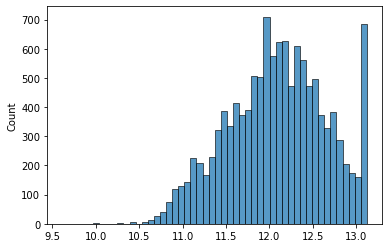

In [43]:
sns.histplot(y_train, bins=50)

### Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

In [44]:
def train_linear_regression(X, y):
    ones = np.ones(len(X))
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return (w_full[0], w_full[1:])

In [46]:
train_data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [62]:
total_bedrooms_train_mean = train_data['total_bedrooms'].mean()
total_bedrooms_train_mean

533.4803317730147

In [50]:
train_data['total_bedrooms'].fillna(total_bedrooms_train_mean)

0         533.480332
1         533.480332
2         533.480332
3         533.480332
4         533.480332
            ...     
12379     283.000000
12380     525.000000
12381    1415.000000
12382     328.000000
12383     487.000000
Name: total_bedrooms, Length: 12384, dtype: float64

In [51]:
train_data.values[: 5]

array([[ 2.0046e+04, -1.1901e+02,  3.6060e+01,  2.5000e+01,  1.5050e+03,
                nan,  1.3920e+03,  3.5900e+02,  1.6812e+00],
       [ 3.0240e+03, -1.1946e+02,  3.5140e+01,  3.0000e+01,  2.9430e+03,
                nan,  1.5650e+03,  5.8400e+02,  2.5313e+00],
       [ 1.5663e+04, -1.2244e+02,  3.7800e+01,  5.2000e+01,  3.8300e+03,
                nan,  1.3100e+03,  9.6300e+02,  3.4801e+00],
       [ 2.0484e+04, -1.1872e+02,  3.4280e+01,  1.7000e+01,  3.0510e+03,
                nan,  1.7050e+03,  4.9500e+02,  5.7376e+00],
       [ 9.8140e+03, -1.2193e+02,  3.6620e+01,  3.4000e+01,  2.3510e+03,
                nan,  1.0630e+03,  4.2800e+02,  3.7250e+00]])

In [63]:
def prepare_X(dataframe, fill_values=total_bedrooms_train_mean):
    df = dataframe.copy()
    df['total_bedrooms'] = df['total_bedrooms'].fillna(fill_values)
    
    X = df.values
    
    return X

In [66]:
def prediction(X, w0, w):
    return w0 + X.dot(w)

In [61]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [69]:
# Fill the missing values with the mean
X_train = prepare_X(train_data, fill_values=total_bedrooms_train_mean)

w0, w = train_linear_regression(X_train, y_train)

y_pred = prediction(X_train, w0, w)

rmse(y_train, y_pred)

0.34080807275611597

In [70]:
# Evaluating the model with the mean
X_val = prepare_X(val_data, fill_values=total_bedrooms_train_mean)

y_pred = prediction(X_val, w0, w)

rmse(y_val, y_pred)

0.32868334343567557

In [74]:
round(0.34080807275611597 - 0.32868334343567557, 2)

0.01

In [71]:
# Fill the missing values with 0
X_train = prepare_X(train_data, fill_values=0)

w0, w = train_linear_regression(X_train, y_train)

y_pred = prediction(X_train, w0, w)

rmse(y_train, y_pred)

0.3410772998866343

In [72]:
# Evaluating the model with 0
X_val = prepare_X(val_data, fill_values=0)

y_pred = prediction(X_val, w0, w)

rmse(y_val, y_pred)

0.32919260369094805

In [75]:
round(0.3410772998866343 - 0.32919260369094805, 0)

0.0

In [76]:
# Fill the missing values with the median
train_median = train_data['total_bedrooms'].median()

X_train = prepare_X(train_data, fill_values=train_median)
w0, w = train_linear_regression(X_train, y_train)
y_pred = prediction(X_train, w0, w)

print(f'rmse for training: {rmse(y_train, y_pred)}')

# Evaluating the model with the median
X_val = prepare_X(val_data, fill_values=train_median)
y_pred = prediction(X_val, w0, w)

print(f'rmse for validation: {rmse(y_val, y_pred)}')

rmse for training: 0.34082620873847047
rmse for validation: 0.328712538289829


In [77]:
round(0.34082620873847047 - 0.328712538289829, 2)

0.01

In [78]:
print('We have a better result using the mean or the median of the total_bedrooms column')

We have a better result using the mean or the median of the total_bedrooms column


## Regularization + Tuning the model

### Question 4
Which r gives the best RMSE?

In [79]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(len(X))
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(len(XTX)) # regularization
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return (w_full[0], w_full[1:])

In [84]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(train_data, fill_values=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(val_data, fill_values=0)

    y_pred = w0 + X_val.dot(w)

    print(f'r = {r}, rmse = {round(rmse(y_val, y_pred), 2)}')

r = 0, rmse = 0.33
r = 1e-06, rmse = 0.33
r = 0.0001, rmse = 0.33
r = 0.001, rmse = 0.33
r = 0.01, rmse = 0.33
r = 0.1, rmse = 0.33
r = 1, rmse = 0.33
r = 5, rmse = 0.34
r = 10, rmse = 0.34


In [85]:
print('r = 0, rmse = 0.33')

r = 0, rmse = 0.33


### Question 5

In [94]:
scores_dic = {}

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    idx = np.arange(n)

    np.random.seed(seed)
    np.random.shuffle(idx)

    train_data = housing_df2.iloc[idx[: n_train]]
    val_data = housing_df2.iloc[idx[n_train: n_train+n_val]]
    test_data = housing_df2.iloc[idx[n_train+n_val: ]]

    y_train = train_data.median_house_value.values
    y_val = val_data.median_house_value.values
    y_test = test_data.median_house_value.values

    del train_data['median_house_value']
    del val_data['median_house_value']
    del test_data['median_house_value']

    train_data = train_data.reset_index()
    val_data = val_data.reset_index()
    test_data = test_data.reset_index()

    y_train = np.log1p(y_train)
    y_val = np.log1p(y_val)
    y_test = np.log1p(y_test)

    X_train = prepare_X(train_data, fill_values=0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=0)

    X_val = prepare_X(val_data, fill_values=0)

    y_pred = w0 + X_val.dot(w)

    print(f'seed = {seed}, rmse = {rmse(y_val, y_pred)}')
    
    scores_dic.update({str(seed): rmse(y_val, y_pred)})

seed = 0, rmse = 0.33893607416257704
seed = 1, rmse = 0.3357153155552983
seed = 2, rmse = 0.3318903102547737
seed = 3, rmse = 0.3402876446196656
seed = 4, rmse = 0.33857716021034356
seed = 5, rmse = 0.34320554775425516
seed = 6, rmse = 0.34525645593354753
seed = 7, rmse = 0.33926700954477496
seed = 8, rmse = 0.34649036274997064
seed = 9, rmse = 0.3364387962289037


In [95]:
scores_std = round(np.std(np.array(list(scores_dic.values()))), 3)
scores_std

0.004

In [96]:
print(f'{scores_std} ~ 0.005')

0.004 ~ 0.005


## Training the model with the best parameters

In [97]:
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

train_data = housing_df2.iloc[idx[: n_train]]
val_data = housing_df2.iloc[idx[n_train: n_train+n_val]]
test_data = housing_df2.iloc[idx[n_train+n_val: ]]

y_train = train_data.median_house_value.values
y_val = val_data.median_house_value.values
y_test = test_data.median_house_value.values

del train_data['median_house_value']
del val_data['median_house_value']
del test_data['median_house_value']

train_data = train_data.reset_index()
val_data = val_data.reset_index()
test_data = test_data.reset_index()

y_train = np.log1p(y_train)
y_val = np.log1p(y_val)
y_test = np.log1p(y_test)

In [98]:
full_train_data = pd.concat([train_data, val_data])

In [99]:
full_train_data.shape

(16512, 9)

In [100]:
full_train_data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,20558,-121.80,38.67,10.0,2086.0,380.0,1073.0,378.0,4.5526
1,11430,-117.97,33.66,22.0,3914.0,600.0,1871.0,607.0,5.8541
2,2656,-124.25,40.28,32.0,1430.0,419.0,434.0,187.0,1.9417
3,14267,-117.11,32.69,37.0,2395.0,627.0,2489.0,599.0,1.5933
4,3684,-118.37,34.21,36.0,1392.0,326.0,1181.0,303.0,3.1563


In [101]:
full_train_data = full_train_data.reset_index(drop=True)

In [102]:
full_y_train = np.concatenate([y_train, y_val])

### Question 6

In [105]:
full_X_train = prepare_X(full_train_data, fill_values=0)
w0, w = train_linear_regression_reg(full_X_train, full_y_train, r=0.001)

X_test = prepare_X(test_data, fill_values=0)

y_pred = w0 + X_test.dot(w)

print(f'rmse = {rmse(y_test, y_pred).round(2)}')

rmse = 0.35
